# First Example

In [26]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [27]:
x,y = make_classification(n_features=2, n_redundant=0,
                         n_informative=2, n_samples=20)

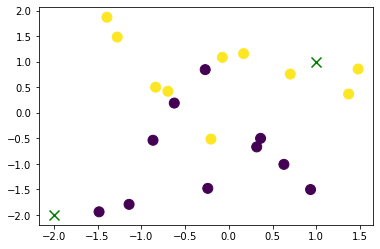

In [36]:
plt.scatter(x[:,0], x[:,1], s=100, c=y)
plt.scatter([-2,1], [-2,1], marker='x', s=100, c='g')
plt.show()

In [43]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x,y)
print('with k=3: ', clf.predict([[-2,-2],[1,1]]))

with k=3:  [0 1]


# Second Example

In [1]:
import pandas as pd

In [2]:
data= pd.read_csv('iris.csv')

In [3]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


The columns in this dataset are:

Sepal.Length
<br>
Sepal.Width
<br>
Petal.Length
<br>
Petal.Width
<br>
Variety (Species) 

In [4]:
# Our target is "variety" (species) So need to check how many of them
print("variety")
print(data['variety'].unique())

variety
['Setosa' 'Versicolor' 'Virginica']


In [5]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


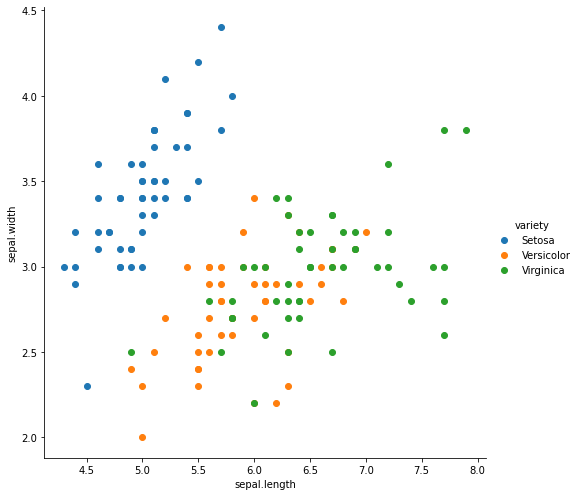

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(data, hue="variety", height=7) \
   .map(plt.scatter, "sepal.length", "sepal.width") \
   .add_legend()

plt.show()

In this case study, we jump the Data Preparation step.

Prepare Data to Apply Modeling Algorithm:

In [11]:
# Let Separate Features and Target for machine Learning
# Step1 


features = list(data.columns[0:4])            # SepalLength   SepalWidth   PetalLength   PetalWidth
target = data.columns[4]                      # Variety (the last column)

print('Features:',features)
print('Target:',target)

# store feature matrix in "X"
X = data.iloc[:,0:4]                          # slicing: all rows and 1 to 4 cols

# store response vector in "y"
y = data.iloc[:,4]                            # slicing: all rows and 5th col


print(y.shape)
print(X.shape)

Features: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
Target: variety
(150,)
(150, 4)


Label Encoding before train the model:

Encode target labels with value between 0 and n_classes-1.
<br>
This transformer should be used to encode target values, i.e. y, and not the input X.
<br>
Read more: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)

# new col
data['EncodedSpecies'] = y

print('Classes:',le.classes_)
print('Species variable after encoding:',y)
data.tail(150)

Classes: ['Setosa' 'Versicolor' 'Virginica']
Species variable after encoding: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal.length,sepal.width,petal.length,petal.width,variety,EncodedSpecies
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


Classification Models:
<br>
K-nearest neighbors (KNN) algorithm:
<br>
Short Description:
Pick a value for K.
Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
Use the most popular target value from the K nearest neighbors as the predicted response value for the unknown iris.

In [13]:
# Build the Model

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=10)

In [18]:
# Prediction for new observation
value = knn.predict([[3, 5, 3,5]])
value

array([2])

In [15]:
# more predictions for other rows

X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]                  
# Consider them as two new rows of input features in X
knn.predict(X_new)

array([1, 1])

In [16]:
# Different value of K 
# instantiate the model (using the value K=5)

knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
print(knn.predict(X_new))

kypred = knn.predict(X)

[1 1]


Split data to Train and Test subsets and evaluate the model using the Test.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [21]:
# Build the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
predictions=knn.predict(X_test)

In [23]:
# Evaluate using Accuracy measure
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [24]:
# See the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[21,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 14]], dtype=int64)